### LSE Data Analytics Online Career Accelerator 

# DA201_Assignment_Notebook

Github repo link: [Leow Min Zheng](https://github.com/Leonardlmz/Leow-Min-Zheng_DA201_Assignment)

Background Info: The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments. The reasons for missed appointments need to be better understood.Therefore, reducing or eliminating missed appointments would be beneficial financially as well as socially. The government needs a data-informed approach to deciding how best to handle this problem. At this stage of the project the two main questions posed by the NHS are:

- Has there been adequate staff and capacity in the networks?
- What was the actual utilisation of resources?

In [1]:
# Import all necessary libraries for the data analytics flow
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import *

### 1. Load and sense-check data sets.

In [2]:
# Read the data files with Pandas
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')

# Determine shape & data type of data set for actual durations.
print(ad.shape)
print(ad.dtypes)
ad.describe()

# Check for null values.
ad.isnull().sum()

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [3]:
# Determine shape & data type of data set for appointments_regional.
print(ar.shape)
print(ar.dtypes)
ar.describe()

# Check for null values.
ar.isnull().sum()

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [4]:
# Determine shape & data type of data set for national_categories.
print(nc.shape)
print(nc.dtypes)
nc.describe()

# Check for null or NA values.
nc.isnull().sum()

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

### 2. Initial exploration of data sets to better understand the data.

To explore:
- How many locations are there in the data set?


In [5]:
# Determine number of locations in data set using unique to only avoid duplicated counts.
print("Number of locations =", len(ad['sub_icb_location_name'].unique()))

Number of locations = 106


- What are the five locations with the highest number of records?

In [6]:
# Five locations with higher number of records for appointments. 
# Group by locations and sort values by descending order.
ad.groupby(['sub_icb_location_name']).sum().sort_values(by='count_of_appointments',ascending= False).head(5)

,count_of_appointments
sub_icb_location_name,
NHS North West London ICB - W2U3Z,6976986
NHS North East London ICB - A3A8R,5341883
NHS Kent and Medway ICB - 91Q,5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V,4712737
NHS South East London ICB - 72Q,4360079


- How many service settings, context types, national categories, and appointment statuses are there?

In [7]:
# Apply values_count to understand each categories of the columns.
print("Types of service setting =", nc.value_counts('service_setting').count())
print("Types of context type =",nc.value_counts('context_type').count())
print("Types of national category =",nc.value_counts('national_category').count())
print("Types of appointment status =",ar.value_counts('appointment_status').count())

Types of service setting = 5
Types of context type = 3
Types of national category = 18
Types of appointment status = 3


### 3. Perform data wrangling to determine any underlying trends and relations.

To explore:
- Between what dates were appointments scheduled? 

In [8]:
# Determine the earliest and latest date in the data set with min and max function.
min_date = ad['appointment_date'].min()
max_date = ad['appointment_date'].max()

print("Earliest appointment date in dataset", min_date)
print("Latest appointment date in dataset", max_date)

Earliest appointment date in dataset 01-Apr-22
Latest appointment date in dataset 31-May-22


- Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?

In [9]:
# Creating subset by filtering location with NHS North West London ICB.
nc_nwlondon = nc[nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z']

# Convert the date to datetime format.
nc_nwlondon['appointment_date'] = pd.to_datetime(nc_nwlondon['appointment_date'],format ='%Y-%m-%d')

# Filtering data with date range between 1 January 2022 to 1 June 2022.
nc_nwlondon_dates = nc_nwlondon.loc[nc_nwlondon['appointment_date'].between('2022-01-01', '2022-06-30')]

# Group by service settings and sort by descending order.
nc_nwlondon_dates.groupby('service_setting').sum().sort_values(by = 'count_of_appointments', ascending = False)


C:\Users\Leona\AppData\Local\Temp\ipykernel_34484\2333853268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_nwlondon['appointment_date'] = pd.to_datetime(nc_nwlondon['appointment_date'],format ='%Y-%m-%d')


,count_of_appointments
service_setting,
General Practice,5719516
Unmapped,462758
Other,181576
Primary Care Network,130526
Extended Access Provision,115052


- Which month had the highest number of appointments?

In [10]:
# Convert the months and years to datetime format and split into 2 columns.
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'],format ='%Y-%m')
nc['appointment_year'] = nc['appointment_month'].dt.year
nc['appointment_month2'] = nc['appointment_month'].dt.month

# Group by year and months, sort the number of appointments by descending.
nc.groupby([nc['appointment_year'], nc['appointment_month2']])\
.sum().sort_values(by = 'count_of_appointments', ascending = False)

count_of_appointments
appointment_year appointment_month2                       
2021             11                               30405070
                 10                               30303834
2022             3                                29595038
2021             9                                28522501
2022             5                                27495508
                 6                                25828078
                 1                                25635474
                 2                                25355260
2021             12                               25140776
2022             4                                23913060
2021             8                                23852171

##### Takeaway: Oct 2021, Nov 2021 and March 2022 has the highest number of records which was not in line with expectation as winter months falls in Jan-March 2022. For that matter, winter in the past has indicated higher rate of GP bookings due to winter flu. However, it could be due to the covid waves in Europe and UK.

[Covid-19 Timeline](https://www.theguardian.com/world/ng-interactive/2021/dec/22/covid-how-has-the-pandemic-changed-in-the-uk-in-2021)


- What was the total number of records per month?

In [11]:
# Showing sum of appointments by year and months.
nc.groupby([nc['appointment_year'], nc['appointment_month2']]).sum()

count_of_appointments
appointment_year appointment_month2                       
2021             8                                23852171
                 9                                28522501
                 10                               30303834
                 11                               30405070
                 12                               25140776
2022             1                                25635474
                 2                                25355260
                 3                                29595038
                 4                                23913060
                 5                                27495508
                 6                                25828078

### 4. Perform simple data visualisation to better determine any underlying trends and relations.

To explore:
- Create visualisations indicating the number of appointments per month for service settings.

In [12]:
# Create data sets for service settings type by months.
nc_ss = nc.groupby(['service_setting','appointment_month']).sum().reset_index()

# View DataFrame output.
nc_ss.head()

,service_setting,appointment_month,count_of_appointments,appointment_year,appointment_month2
0,Extended Access Provision,2021-08-01,160927,18235483,72184
1,Extended Access Provision,2021-09-01,187906,19617847,87363
2,Extended Access Provision,2021-10-01,209539,19508713,96530
3,Extended Access Provision,2021-11-01,207577,20573780,111980
4,Extended Access Provision,2021-12-01,173504,19094408,113376


C:\Users\Leona\AppData\Local\Temp\ipykernel_34484\2724360171.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels,rotation=45)


[Text(18840.0, 0, '2021-08-01 00:00:00'),
 Text(18871.0, 0, '2021-09-01 00:00:00'),
 Text(18901.0, 0, '2021-10-01 00:00:00'),
 Text(18932.0, 0, '2021-11-01 00:00:00'),
 Text(18962.0, 0, '2021-12-01 00:00:00'),
 Text(18993.0, 0, '2022-01-01 00:00:00'),
 Text(19024.0, 0, '2022-02-01 00:00:00'),
 Text(19052.0, 0, '2022-03-01 00:00:00'),
 Text(19083.0, 0, '2022-04-01 00:00:00'),
 Text(19113.0, 0, '2022-05-01 00:00:00'),
 Text(19144.0, 0, '2022-06-01 00:00:00')]

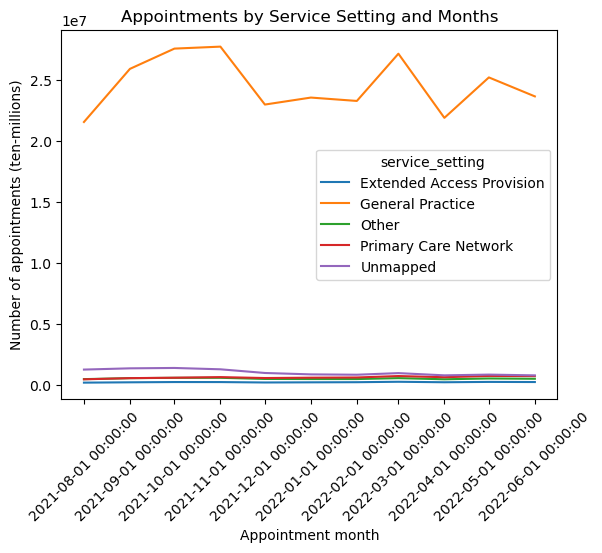

In [13]:
# Create lineplot for service settings.
ax = sns.lineplot(x='appointment_month', y='count_of_appointments', data= nc_ss, hue='service_setting')

# Set labels and titles.
ax.set_xlabel("Appointment month")
ax.set_ylabel("Number of appointments (ten-millions)")
ax.set_title("Appointments by Service Setting and Months")
x_labels = nc_ss['appointment_month']
# Rotate x-axis label to prevent overlapping of labels.
ax.set_xticklabels(x_labels,rotation=45)

##### Thought - process: As the chart is skewed by high volumne category 'General Practise', it has led to less effective visualations. Hence, I have decided to split 'General Practise' from others and plot in 2 subplots. 

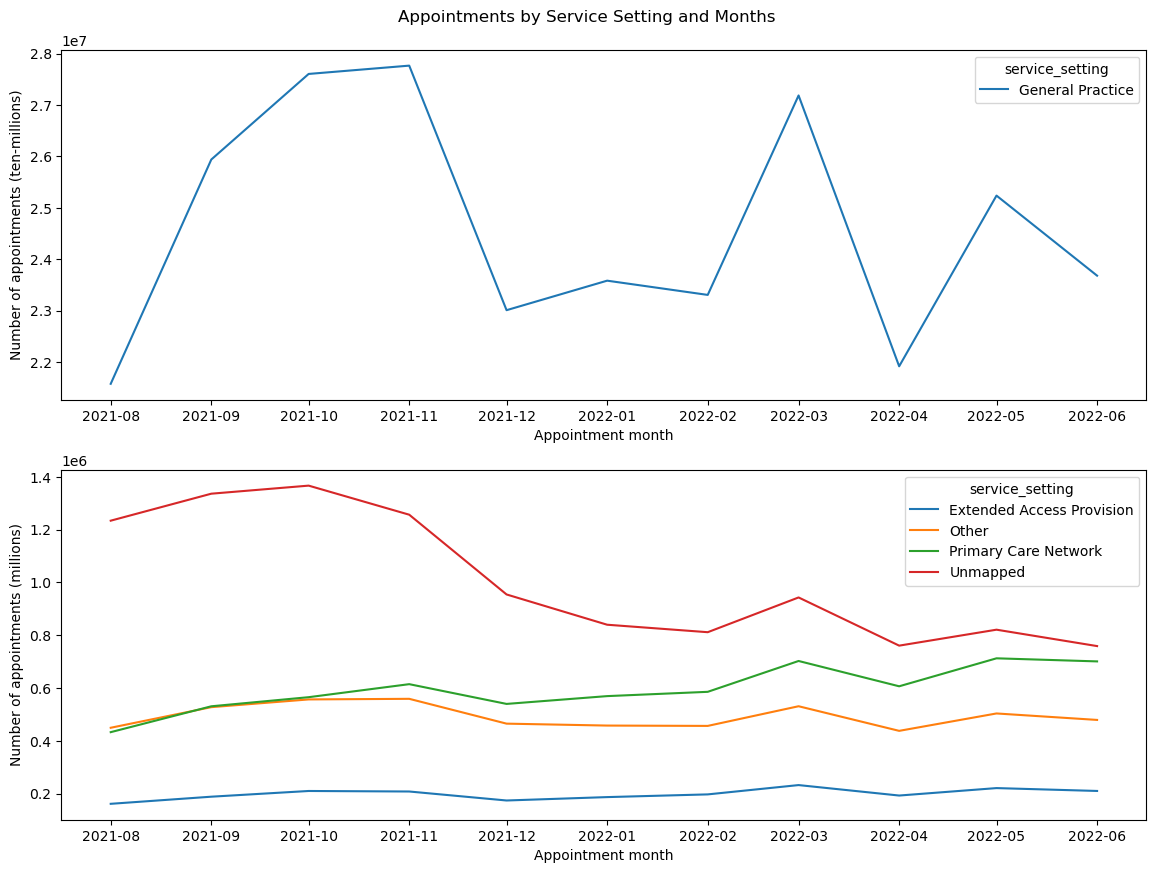

In [14]:
# Separate GP as it skewed the graph visualisations.
fig, ax = plt.subplots(2)
fig.set_size_inches(14, 10)

# Seperate the data sets as General Practise skewed the visualisations.
gp = nc_ss['service_setting'].isin(['General Practice'])
nc_ss_gp = nc_ss[gp]    

# Create a dataframe of other categories excluding General Practise.
nc_ss_other = nc_ss[~gp]


# Create lineplots.
sns.lineplot(x='appointment_month', y='count_of_appointments', ax=ax[0],
             data=nc_ss_gp, hue='service_setting')

sns.lineplot(x='appointment_month', y='count_of_appointments', ax=ax[1],
             data=nc_ss_other, hue='service_setting')

# Set labels and titles
ax[0].set_xlabel("Appointment month")
ax[1].set_xlabel("Appointment month")
ax[0].set_ylabel("Number of appointments (ten-millions)")
ax[1].set_ylabel("Number of appointments (millions)")
fig.suptitle("Appointments by Service Setting and Months", y=0.92)

# View the lineplots.
plt.show()

#### Trend: Main trend of General Practise stays in line with the overall data trend mainly due to its dominant propotion in the data set. As for the others, unmapped data sets has came in second which could not be analysed further due to lack of data and hence disregarded until further data is obtained. Remaining categories has remained fairly constand with slight upward trend. Is it notable that 'unmapped' data has decreased significantly which could indicate improvement in data input and recording process.

- Create visualisations indicating the number of appointments per month for context types

In [15]:
# Create data sets for context types by months.
nc_ct = nc.groupby(['context_type','appointment_month']).sum().reset_index()

# View DataFrame output.
nc_ct.head()

,context_type,appointment_month,count_of_appointments,appointment_year,appointment_month2
0,Care Related Encounter,2021-08-01,20255235,120459684,476832
1,Care Related Encounter,2021-09-01,24404251,129000430,574470
2,Care Related Encounter,2021-10-01,26125201,127195677,629370
3,Care Related Encounter,2021-11-01,26282778,134299492,730972
4,Care Related Encounter,2021-12-01,21798612,125471764,745008


##### Thought - process: Similar with previous chart, the data is skewed by high volumne category 'Care Related Encounter'. Hence, I have decided to split 'Care Related Encounter' from others and plot in 2 subplots. 

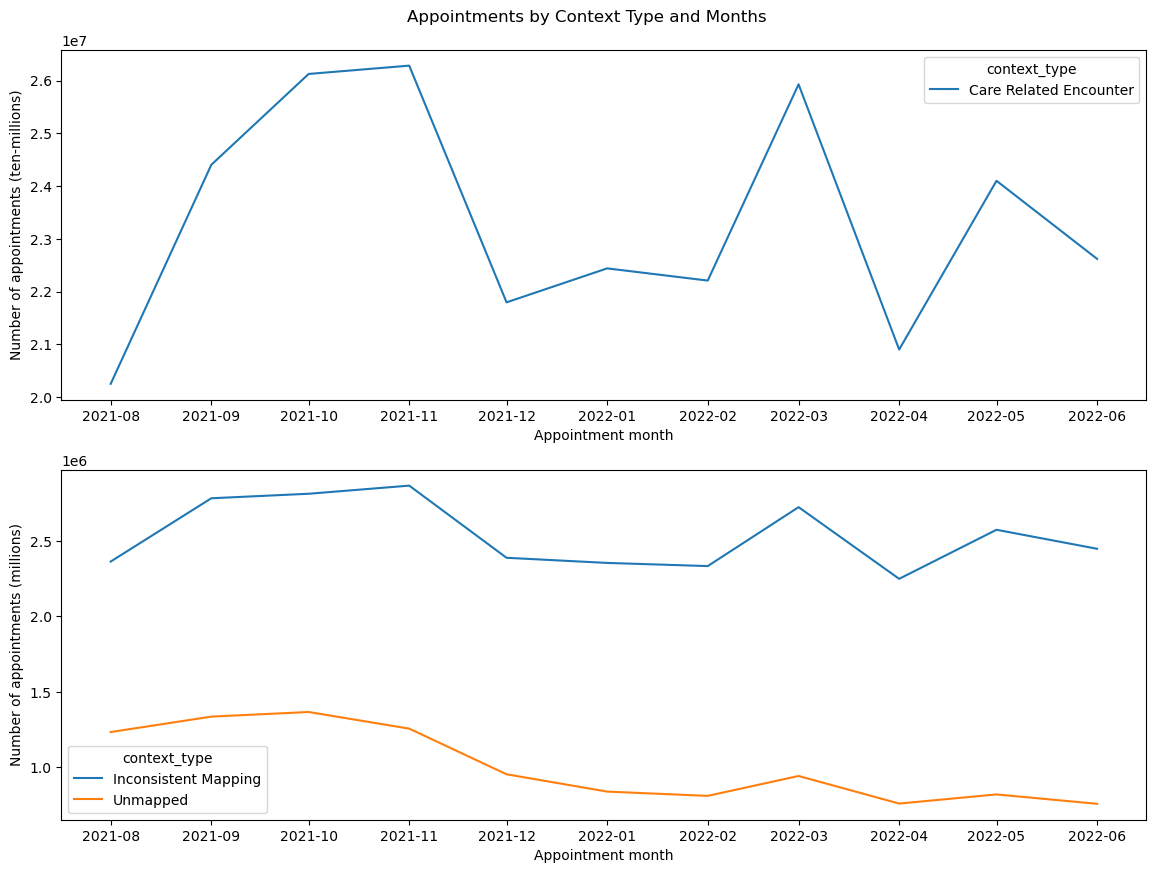

In [16]:
# Separate Care Related Encounter as it skewed the graph visualisations.
fig, ax = plt.subplots(2)
fig.set_size_inches(14, 10)

# Seperate the data sets as Care Related Encounter.
cre = nc_ct['context_type'].isin(['Care Related Encounter'])
nc_ct_cre = nc_ct[cre]
 
# List of others excluding Care Related Encounter.
nc_ct_other = nc_ct[~cre]


# Create lineplots.
sns.lineplot(x='appointment_month', y='count_of_appointments', ax=ax[0],
             data=nc_ct_cre, hue='context_type')

sns.lineplot(x='appointment_month', y='count_of_appointments', ax=ax[1],
             data=nc_ct_other, hue='context_type')

# Set labels and titles
ax[0].set_xlabel("Appointment month")
ax[1].set_xlabel("Appointment month")
ax[0].set_ylabel("Number of appointments (ten-millions)")
ax[1].set_ylabel("Number of appointments (millions)")
fig.suptitle("Appointments by Context Type and Months", y=0.92)

# View the lineplots.
plt.show()

##### Trend: Main trend of Care Related Encounte stays in line with the overall data trend with peak months in Oct 2021-Nov 2021 and March 2022. As for the others, inconsistent mapping and unmapped data sets could not be analysed further due to lack of data and hence disregarded at the moment until further details is obtained.

### 5. Perform deep-dive data analysis and visualisation to tackle the key objective of the data analysis.
- Should the NHS start looking at increasing staff levels?



In [17]:
# Create new data series to simplify and select only required columns.
ar_agg = ar[['appointment_month', 'hcp_type', 'appointment_status',
             'appointment_mode', 'time_between_book_and_appointment',
             'count_of_appointments']]

# Group by appointment months and reset index.
ar_agg_month = ar_agg.groupby('appointment_month').sum().reset_index()

# View the DataFrame.
ar_agg_month.head()

,appointment_month,count_of_appointments
0,2020-01,27199296
1,2020-02,24104621
2,2020-03,24053468
3,2020-04,16007881
4,2020-05,16417212


In [18]:
# Calculate average utilisations by assuming 30 days value & 22 days for only weekdays basis.
ar_agg_month['utilisation_full_month'] = round(ar_agg_month['count_of_appointments']/30,1)
ar_agg_month['utilisation_weekdays'] = round(ar_agg_month['count_of_appointments']/22,1)

# View results of DataFrame.
ar_agg_month.head()

,appointment_month,count_of_appointments,utilisation_full_month,utilisation_weekdays
0,2020-01,27199296,906643.2,1236331.6
1,2020-02,24104621,803487.4,1095664.6
2,2020-03,24053468,801782.3,1093339.5
3,2020-04,16007881,533596.0,727631.0
4,2020-05,16417212,547240.4,746236.9


##### Thought - process : Although hospitals work 24/7, most GP only works on weekdays in the UK, hence assuming 4 weekends (8 days) are taken of to better present the actual capacity.

C:\Users\Leona\AppData\Local\Temp\ipykernel_34484\3372786116.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(x_labels, rotation=45)
C:\Users\Leona\AppData\Local\Temp\ipykernel_34484\3372786116.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(x_labels, rotation=45)


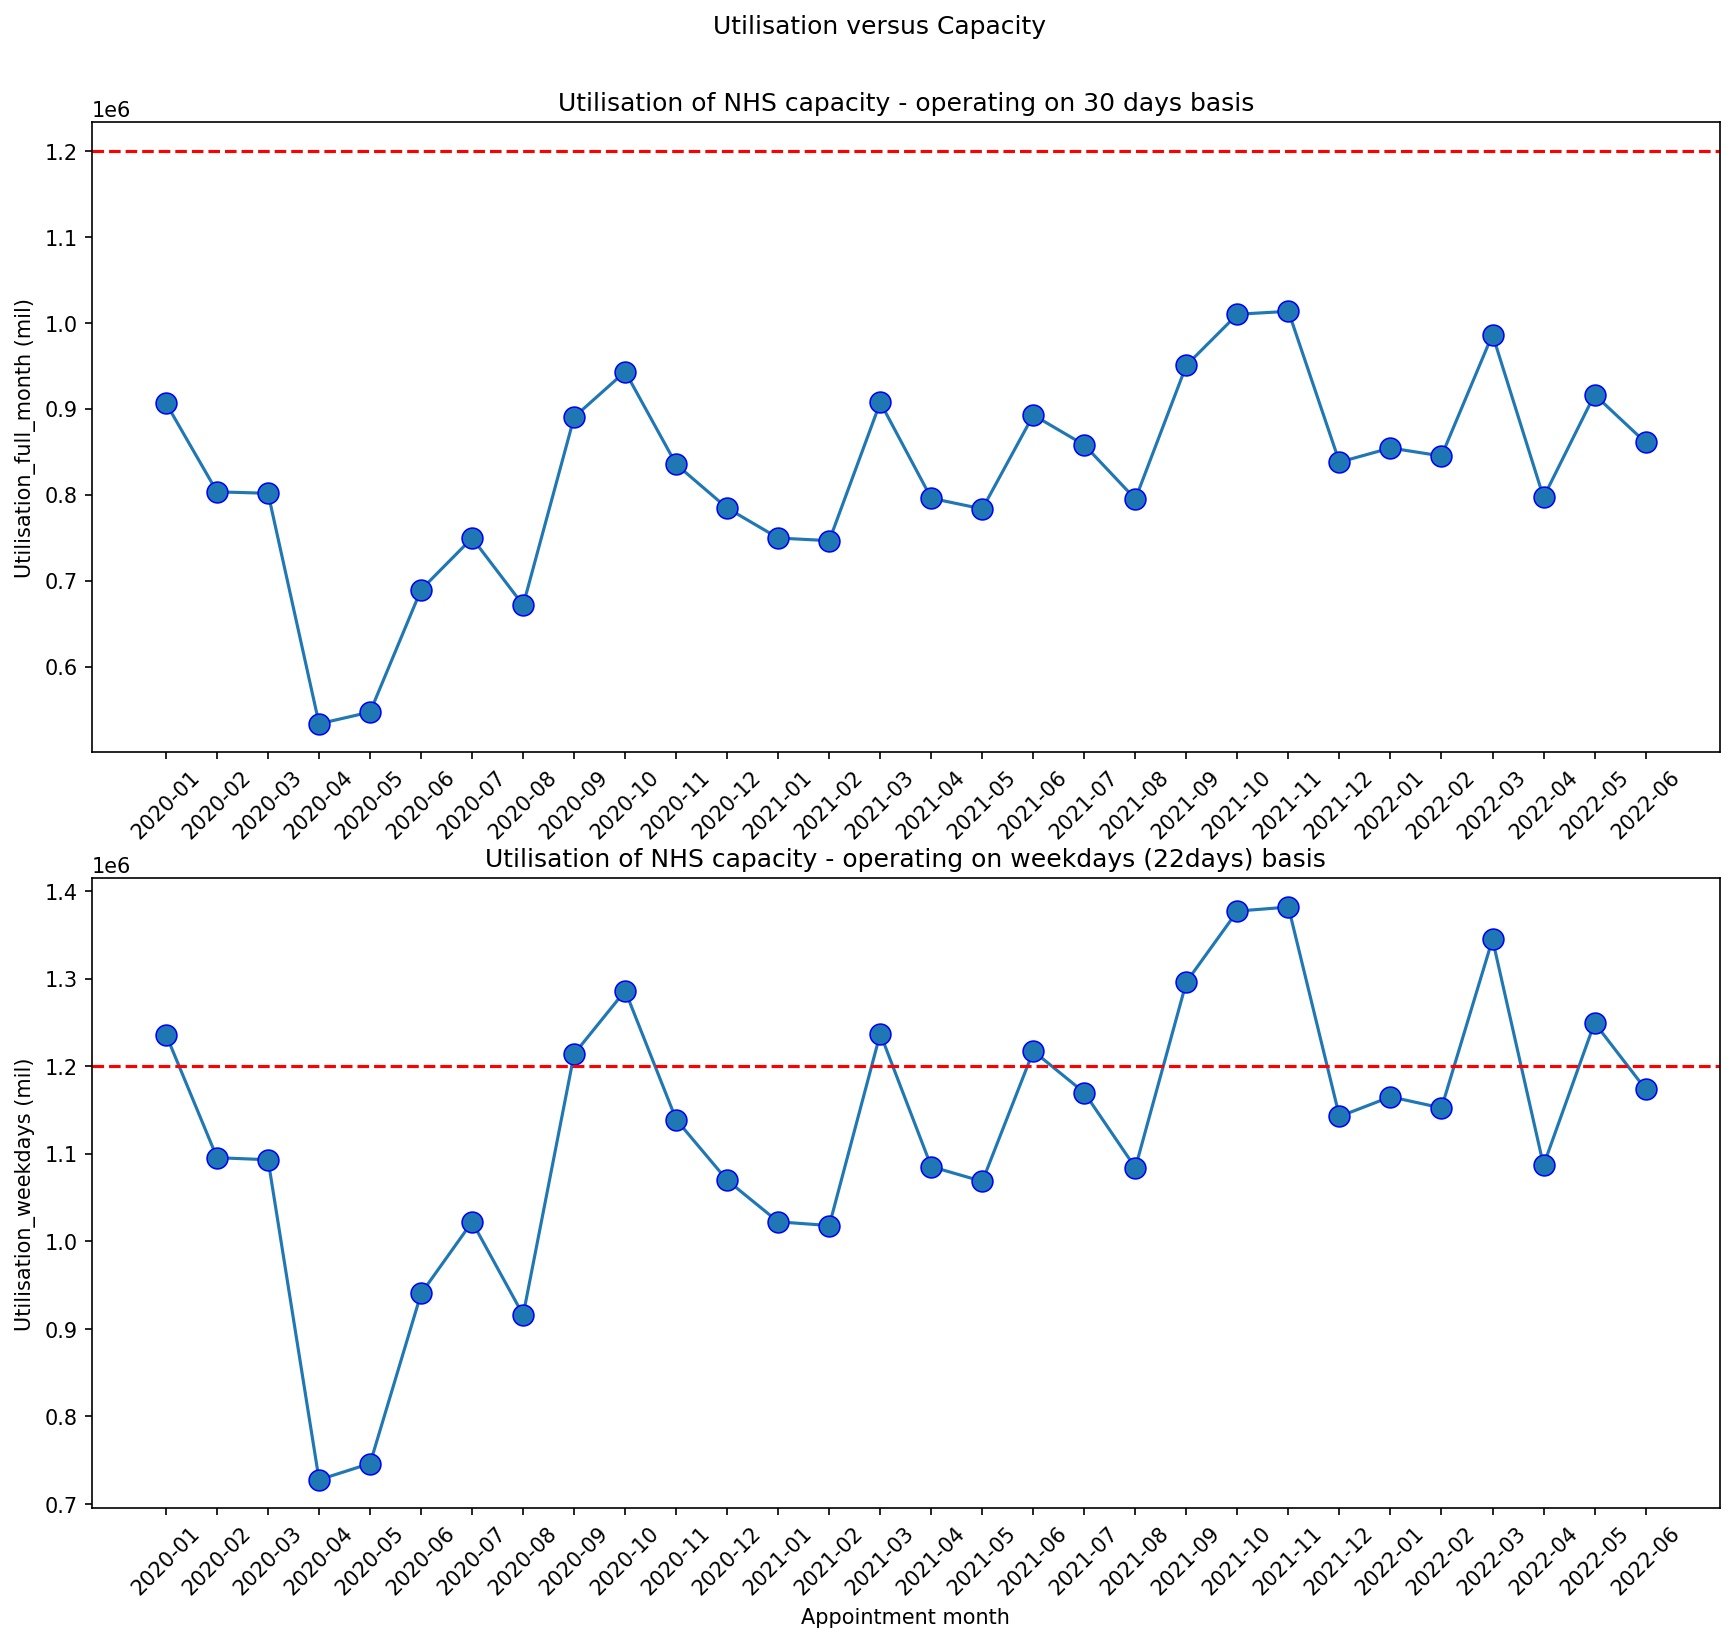

In [19]:
# Create subplots of 2 to reflect the 2 utilisation comparison.
fig, ax = plt.subplots(2,dpi=150)
fig.set_size_inches(14, 12)

# Create lineplots.
sns.lineplot(x='appointment_month', y='utilisation_full_month', ax=ax[0],
             data=ar_agg_month,marker='o', markeredgecolor='blue', markersize=10)

sns.lineplot(x='appointment_month', y='utilisation_weekdays', ax=ax[1],
             data=ar_agg_month, marker='o', markeredgecolor='blue', markersize=10)


# Set labels and titles
ax[0].set_xlabel("  ")
ax[1].set_xlabel("Appointment month")
ax[0].set_ylabel("Utilisation_full_month (mil)")
ax[1].set_ylabel("Utilisation_weekdays (mil)")
fig.suptitle("Utilisation versus Capacity", y=0.94)
ax[0].title.set_text('Utilisation of NHS capacity - operating on 30 days basis')
ax[1].title.set_text('Utilisation of NHS capacity - operating on weekdays (22days) basis')

# Set x-ticks label to be more visible.
x_labels = ar_agg_month['appointment_month']

ax[0].set_xticklabels(x_labels, rotation=45)
ax[1].set_xticklabels(x_labels, rotation=45)

# Add annotation lines. 1.2mil is the maximum that NHS can accommodate per day.
plt.axhline(y=1200000, color='r', linestyle='--')
ax[0].axhline(y=1200000, color='r', linestyle='--')

# View the lineplots.
plt.show()

##### Trend: The capacity has surplus if the workforce runs at full-time with no rest. However, at 22 workdays per month, there are period of times where NHS capacity of 1.2mil daily is insufficient to meet the demand.

 - What are there locations that has insufficient capacity?

In [20]:
# Download and trimmed data for NHS population from \
# https://www.england.nhs.uk/wp-content/uploads/2022/04/j-overall-weighted-populations-22-23.xlsx
# Read the data files with Pandas
nhs_population = pd.read_excel('NHS_weighted_population.xlsx')

# Remove any NA values.
nhs_population.dropna(inplace=True)

# View results of DataFrame.
nhs_population.head()

,Integrated Care Board,Overall ICB weighted population
1,NHS Humber and North Yorkshire ICB,1.825191e+06
2,NHS North East and North Cumbria ICB,3.511039e+06
3,NHS South Yorkshire ICB,1.540922e+06
4,NHS West Yorkshire ICB,2.639150e+06
6,NHS Cheshire and Merseyside ICB,3.033517e+06


In [21]:
# Create new dataset for actual duration with trimmed name for merge purpose.
ad_population = ad[['sub_icb_location_name','count_of_appointments']]

# Set the separator between location name and icb location code
sep = ' - '

# Create 2 new columns for the string split.
ad_population[['Integrated Care Board','icb_location_code']] = ad_population[
    'sub_icb_location_name'].str.split(sep, expand=True)

# View the output.
ad_population.head()

C:\Users\Leona\AppData\Local\Temp\ipykernel_34484\332051710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_population[['Integrated Care Board','icb_location_code']] = ad_population[
C:\Users\Leona\AppData\Local\Temp\ipykernel_34484\332051710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_population[['Integrated Care Board','icb_location_code']] = ad_population[


,sub_icb_location_name,count_of_appointments,Integrated Care Board,icb_location_code
0,NHS North East and North Cumbria ICB - 00L,364,NHS North East and North Cumbria ICB,00L
1,NHS North East and North Cumbria ICB - 00L,619,NHS North East and North Cumbria ICB,00L
2,NHS North East and North Cumbria ICB - 00L,1698,NHS North East and North Cumbria ICB,00L
3,NHS North East and North Cumbria ICB - 00L,1277,NHS North East and North Cumbria ICB,00L
4,NHS North East and North Cumbria ICB - 00L,730,NHS North East and North Cumbria ICB,00L


In [22]:
# Apply Groupby on ICB locations
ad_location_population = ad_population.groupby('Integrated Care Board').sum()

ad_location_population.head()

,count_of_appointments
Integrated Care Board,
NHS Bath and North East Somerset Swindon and Wiltshire ICB,3012568
NHS Bedfordshire Luton and Milton Keynes ICB,2791385
NHS Birmingham and Solihull ICB,3600087
NHS Black Country ICB,3901431
NHS Bristol North Somerset and South Gloucestershire ICB,2756491


In [23]:
# Merge NHS population with ar table.
ar_nhs_population = pd.merge(ad_location_population, nhs_population, 
                           how='left', on='Integrated Care Board') 

# View output and check for any NA value.
print(ar_nhs_population.head())
print(ar_nhs_population.isna().sum())

                               Integrated Care Board  count_of_appointments  \
0  NHS Bath and North East Somerset Swindon and W...                3012568   
1       NHS Bedfordshire Luton and Milton Keynes ICB                2791385   
2                    NHS Birmingham and Solihull ICB                3600087   
3                              NHS Black Country ICB                3901431   
4  NHS Bristol North Somerset and South Glouceste...                2756491   

   Overall ICB  weighted population   
0                       9.342794e+05  
1                       9.905675e+05  
2                       1.622642e+06  
3                       1.350930e+06  
4                       1.049021e+06  
Integrated Care Board                0
count_of_appointments                0
Overall ICB  weighted population     0
dtype: int64


In [24]:
# Calculate actual coverage/utilisation of NHS by population.
# As the sum is made of 7 months, divide by 7 and 22 work days. Multiply to get %.
# Divide by population to see daily coverage.                           
ar_nhs_population['utilisation'] = ar_nhs_population[
    'count_of_appointments']/7/22*100/ar_nhs_population['Overall ICB  weighted population ']
                                   
# Sort by descending order.
ar_nhs_population.sort_values(by='utilisation',ascending=False,ignore_index=True)

,Integrated Care Board,count_of_appointments,Overall ICB weighted population,utilisation
0,NHS Leicester Leicestershire and Rutland ICB,3610315,1.061848e+06,2.207811
1,NHS Gloucestershire ICB,2127909,6.383727e+05,2.164502
2,NHS Herefordshire and Worcestershire ICB,2696703,8.165112e+05,2.144619
3,NHS Cambridgeshire and Peterborough ICB,2937987,8.917173e+05,2.139449
4,NHS Devon ICB,4255338,1.309305e+06,2.110437
5,NHS Bath and North East Somerset Swindon and W...,3012568,9.342794e+05,2.093820
6,NHS Cornwall and The Isles Of Scilly ICB,2097913,6.612804e+05,2.060066
7,NHS West Yorkshire ICB,8291440,2.639150e+06,2.040070
8,NHS Norfolk and Waveney ICB,3490647,1.158677e+06,1.956243
9,NHS Lincolnshire ICB,2457468,8.240194e+05,1.936555


In [25]:
# Calculate daily capacity by country population.
benchmark = 1200000/ar_nhs_population['Overall ICB  weighted population '].sum()*100

# Round the benchmark
benchmark.round(2)

1.95

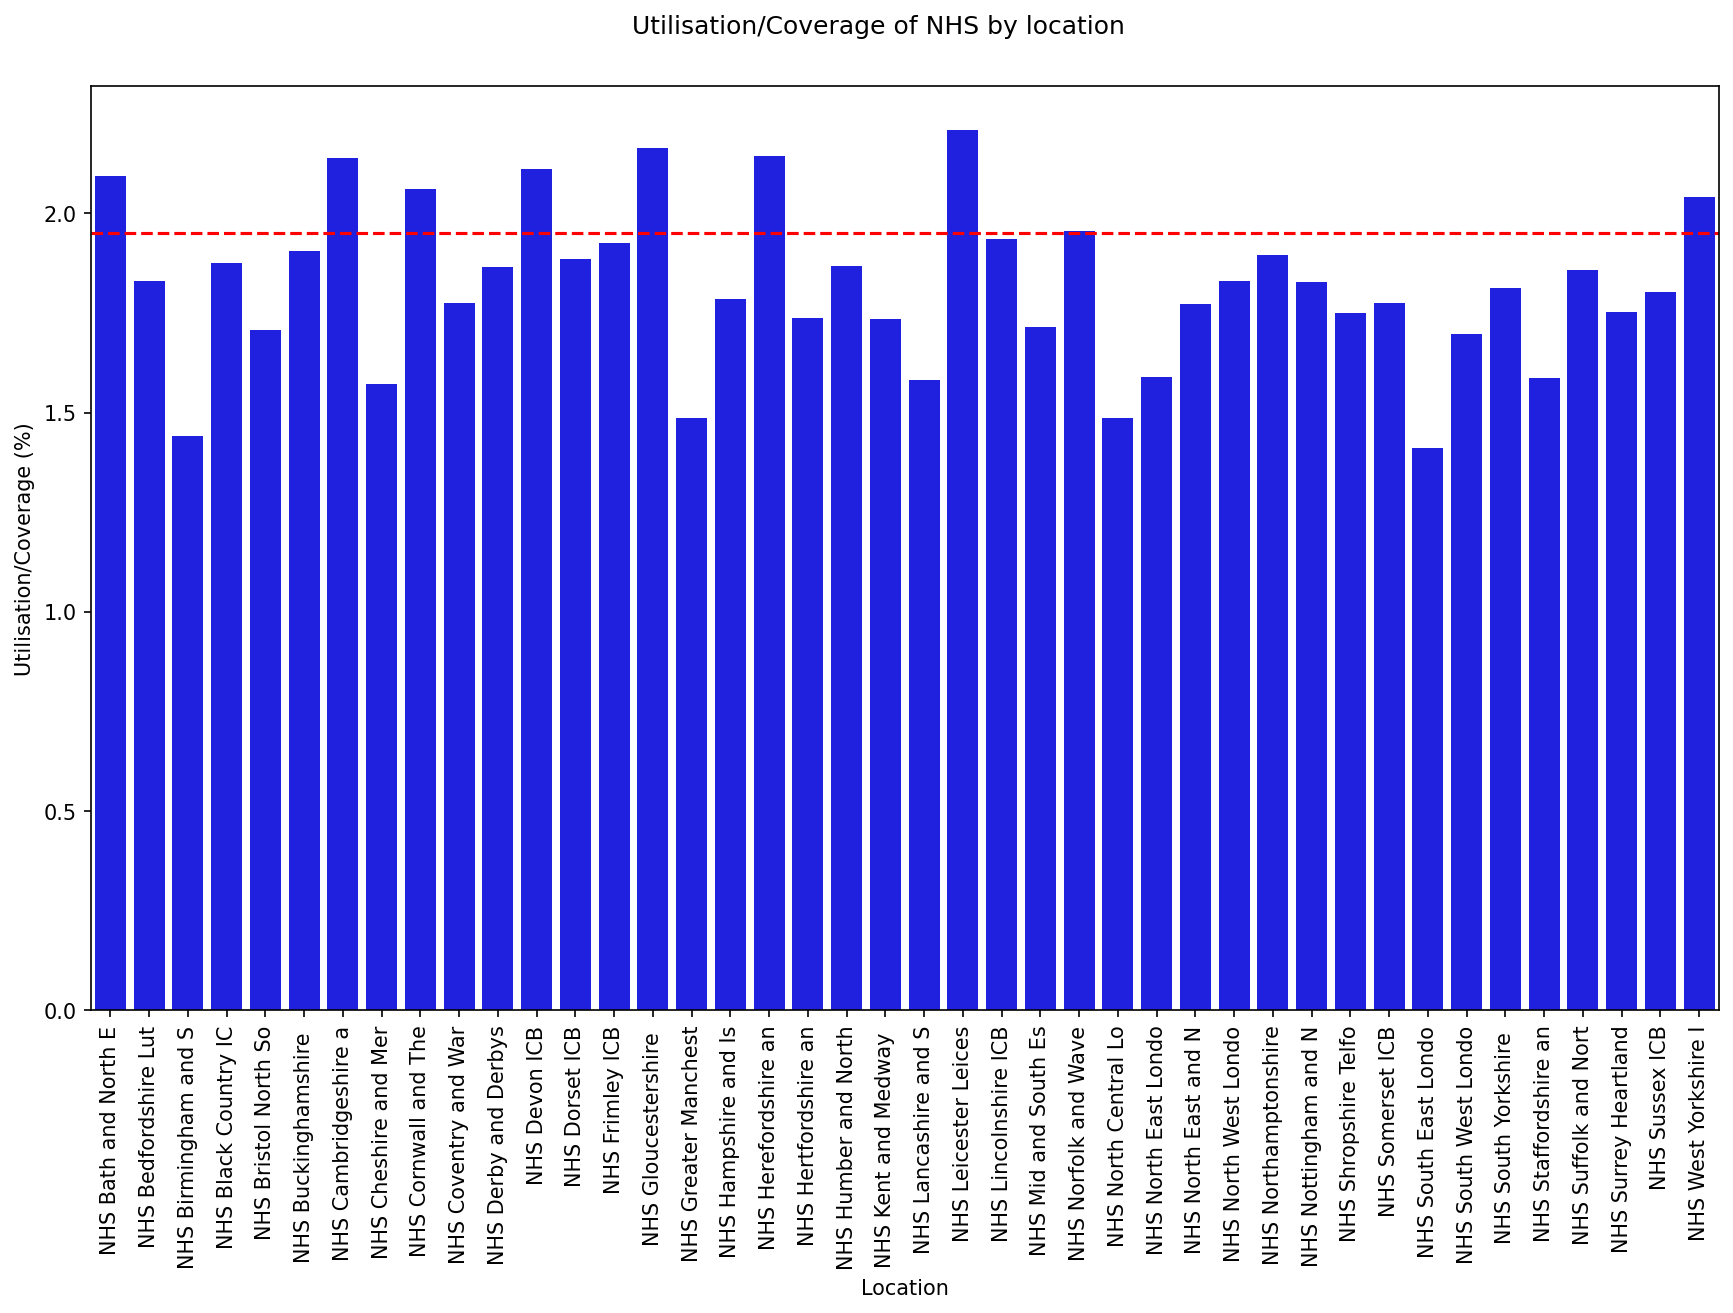

In [26]:
# Create barplots.
fig, ax_population = plt.subplots(dpi=150)
fig.set_size_inches(14, 8)

# Plot details of bar, using estimator = sum to show movement of overall %.
sns.barplot(y='utilisation',x='Integrated Care Board',data=ar_nhs_population,color='blue')
           
# Set labels and titles
ax_population.set_xlabel("Location")
ax_population.set_ylabel("Utilisation/Coverage (%)")
fig.suptitle("Utilisation/Coverage of NHS by location", y=0.94)


# Add annotation lines. Benchmark is calculated as above at 1.95.
plt.axhline(y=benchmark, color='r', linestyle='--')

# Character of location is too long, kept at 20 character to have better visibility.
ax_population.set_xticklabels(item.get_text()[:20] for item in ax_population.get_xticklabels())
ax_population.set_xticklabels(ax_population.get_xticklabels(), rotation=90)

# Saved for presentation purpose
fig.savefig('utilisation_print.png', dpi=300)

In [27]:
# Filter those areas that are lower than benchmark capacity.
ar_nhs_under_capacity = ar_nhs_population[ar_nhs_population['utilisation'] > benchmark].sort_values('utilisation',ascending=False,ignore_index=True)

# view the output
print(ar_nhs_under_capacity.shape)
ar_nhs_under_capacity

(9, 4)


,Integrated Care Board,count_of_appointments,Overall ICB weighted population,utilisation
0,NHS Leicester Leicestershire and Rutland ICB,3610315,1.061848e+06,2.207811
1,NHS Gloucestershire ICB,2127909,6.383727e+05,2.164502
2,NHS Herefordshire and Worcestershire ICB,2696703,8.165112e+05,2.144619
3,NHS Cambridgeshire and Peterborough ICB,2937987,8.917173e+05,2.139449
4,NHS Devon ICB,4255338,1.309305e+06,2.110437
5,NHS Bath and North East Somerset Swindon and W...,3012568,9.342794e+05,2.093820
6,NHS Cornwall and The Isles Of Scilly ICB,2097913,6.612804e+05,2.060066
7,NHS West Yorkshire ICB,8291440,2.639150e+06,2.040070
8,NHS Norfolk and Waveney ICB,3490647,1.158677e+06,1.956243


 - Are there significant changes in whether or not visits are attended?

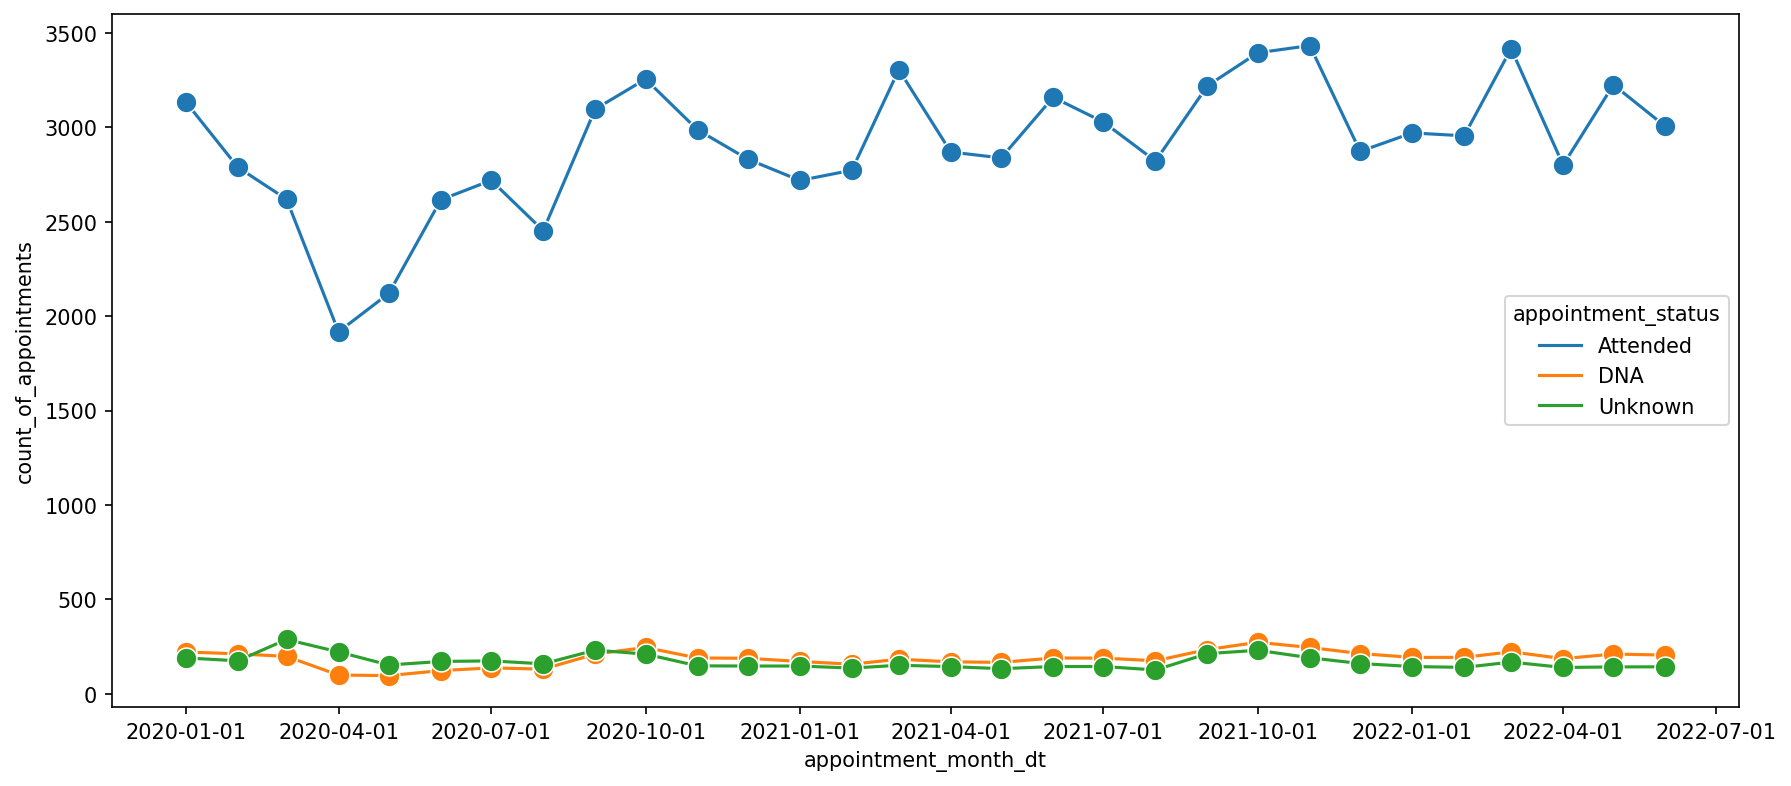

In [28]:
# Convert months column to datetime format.
ar['appointment_month_dt'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m')

# Create lineplots.
fig, ax_status = plt.subplots(dpi=150)
fig.set_size_inches(14, 6)
sns.lineplot(x='appointment_month_dt', y='count_of_appointments', hue='appointment_status',
             data=ar,marker='o', markersize=10, ci=None)

# Reset date label to be more visible.
major_locator = AutoDateLocator('appointment_month_dt')
formatter = AutoDateFormatter('major_locator')
ax_status.xaxis.set_major_formatter(formatter)

#### Trend: An downward trend is noted from Jan 2020 to April 2020, which could be due to COVID-19 lockdown. Following that, the attendance rate has resumed and has showed a slight increase.

- Are there any trends in time between booking and appointment?

##### Thought-process: As 'Attended' catergory skewed the data significantly, perform a normalisation of data and calculate the percentage of total to better determine the underlying trend.

In [29]:
# Create a separate DataFrame to calculate percentages of total for appointment type vs time of bookings.
ar_status_time = ar[['appointment_status','time_between_book_and_appointment','count_of_appointments']]

# Calculate percentage by calculating count of appointment/ total count of appointments by time of bookings.
ar_status_time['percentage'] = ar_status_time['count_of_appointments']*100/\
ar_status_time.groupby('time_between_book_and_appointment')['count_of_appointments'].transform('sum')

# View results of DataFrame.
ar_status_time.head()

C:\Users\Leona\AppData\Local\Temp\ipykernel_34484\1499479636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_status_time['percentage'] = ar_status_time['count_of_appointments']*100/\


,appointment_status,time_between_book_and_appointment,count_of_appointments,percentage
0,Attended,1 Day,8107,0.011972
1,Attended,15 to 21 Days,6791,0.015900
2,Attended,2 to 7 Days,20686,0.013450
3,Attended,22 to 28 Days,4268,0.016713
4,Attended,8 to 14 Days,11971,0.013784


Text(1.1, 50, 'Did Not Attend(DNA) increased as days beween appointment increased')

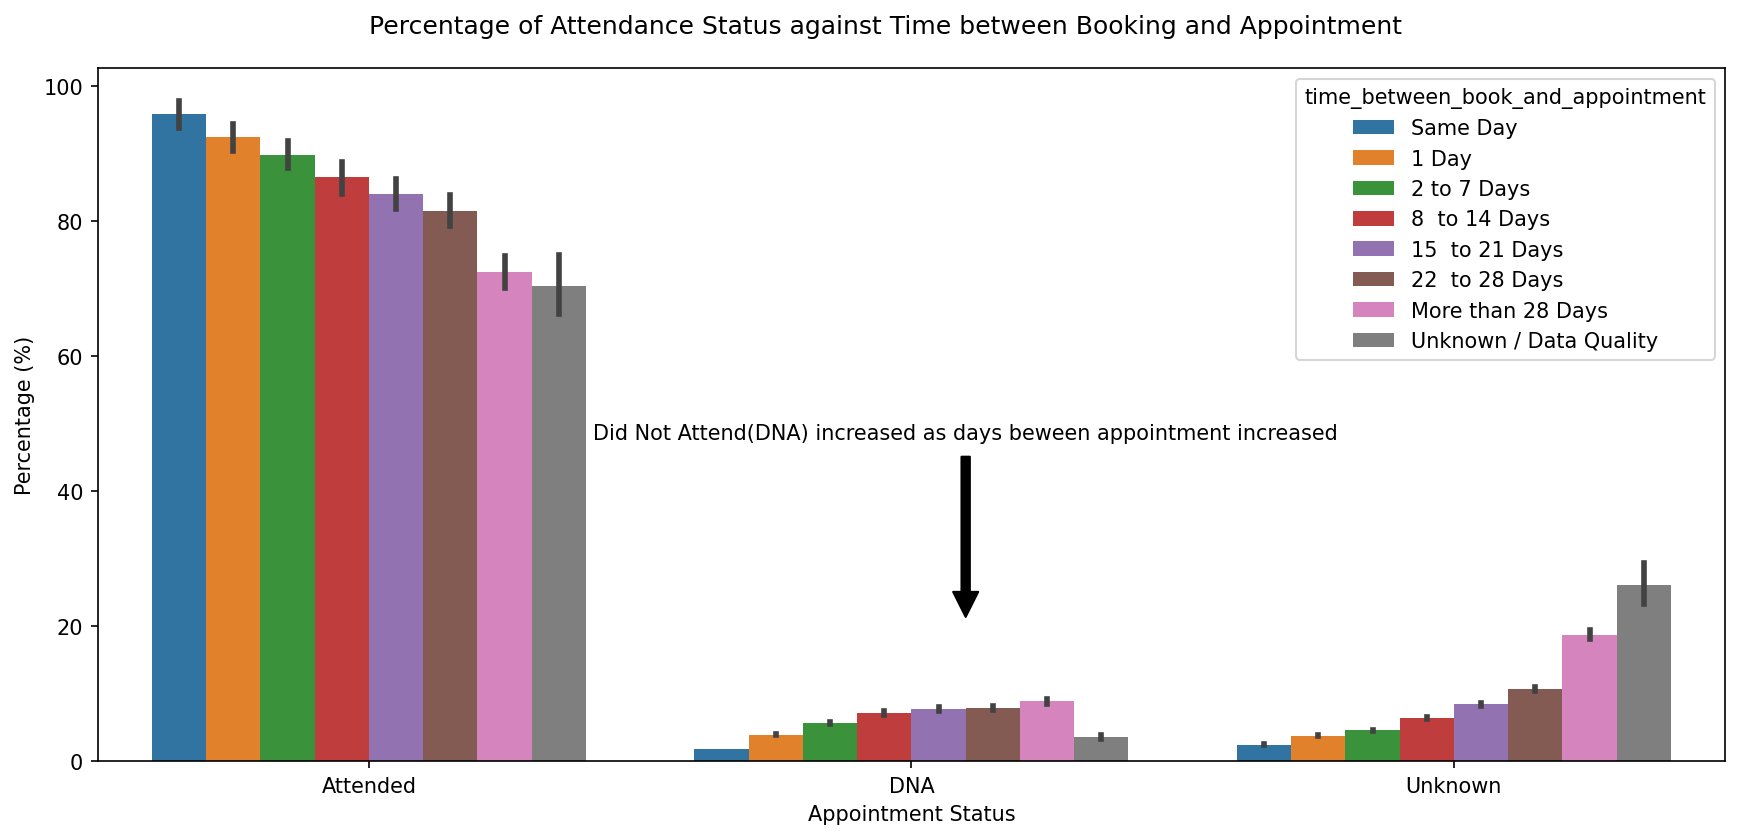

In [30]:
# Create barplots.
fig, ax_status = plt.subplots(dpi=150)
fig.set_size_inches(14, 6)

# Plot details of bar, using estimator = sum to show movement of overall %.
sns.barplot(x='appointment_status', y='percentage', estimator=sum,
            hue='time_between_book_and_appointment', data=ar_status_time,
            # Rearrange the order to show in sequence.
            hue_order=['Same Day','1 Day','2 to 7 Days','8  to 14 Days',
                 '15  to 21 Days','22  to 28 Days', 'More than 28 Days',
                 'Unknown / Data Quality'])

# Set labels and titles
ax_status.set_xlabel("Appointment Status")
ax_status.set_ylabel("Percentage (%)")
fig.suptitle("Percentage of Attendance Status against Time between Booking and Appointment", y=0.94)

# Set annotation and create an arrow plot to indicate the key trend.
ax_status.annotate("Did Not Attend(DNA) increased as days beween appointment increased",
                   xy=(1.1, 20), xytext=(1.1, 50),
                   arrowprops={'facecolor': 'black', 'shrink': 0.05},
                   horizontalalignment='center', verticalalignment='top')

##### Trend: The longer the time between booking and appointment, the higher the rate of DNA. This could be due to patients forgetting about their appointments after a period of time. Unknown status shared the same trend as did not attend, as there are no further data available, it is treated as DNA as well.  

 - Are there significant changes in actual durations?

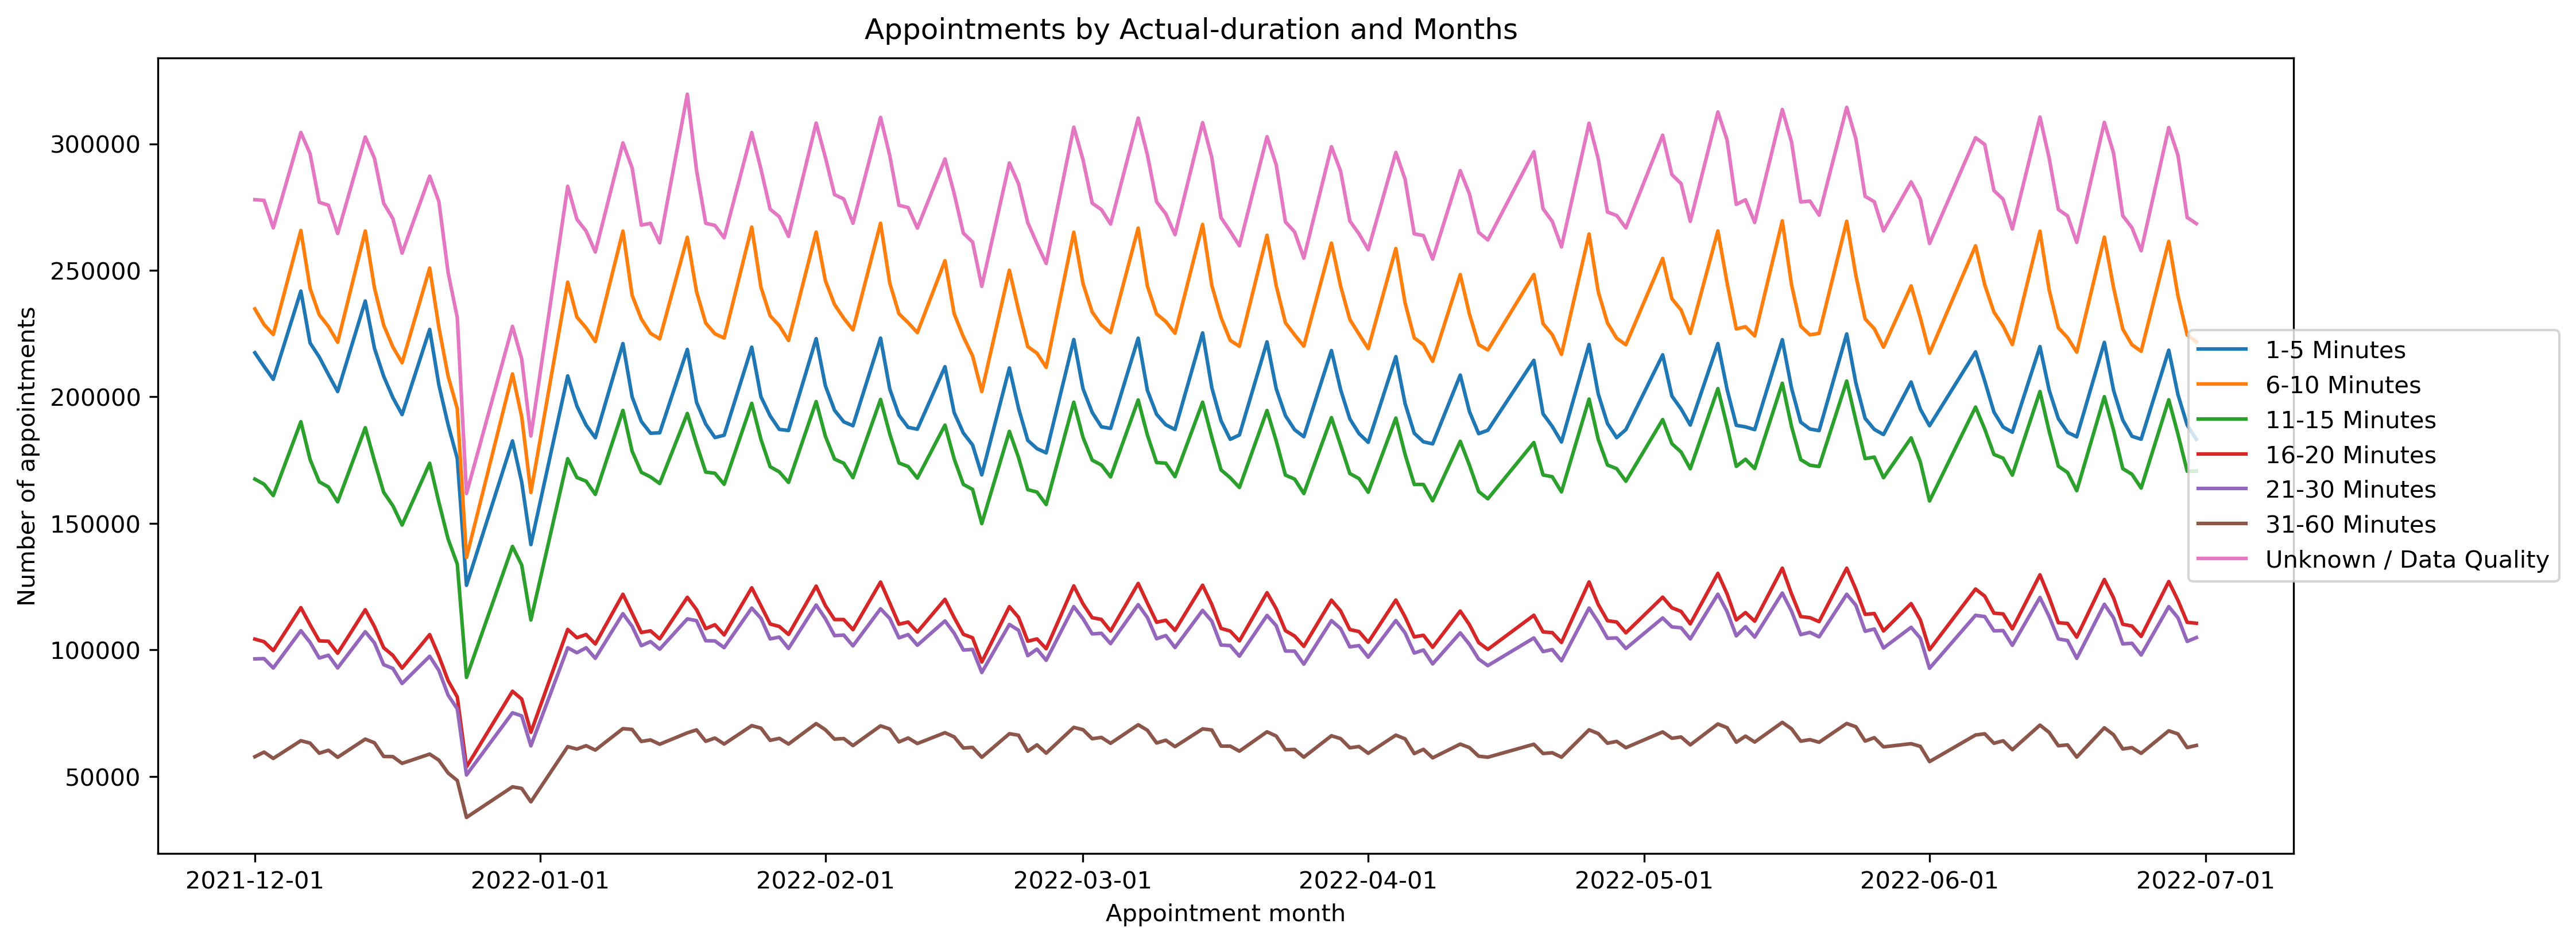

In [31]:
# Convert months column to datetime format.
ad['appointment_date_dt'] = pd.to_datetime(ad['appointment_date'])
ad['Weekdays'] = ad['appointment_date_dt'].dt.strftime('%a')

# # Seperate the data sets to exclude weekends and UK Bank Holidays.
ad_weekdays = ad[~ad['Weekdays'].isin(['Sat', 'Sun']) & 
                 ~ ad['appointment_date_dt'].isin(['2021-12-27','2021-12-28','2022-01-03',
                                                   '2022-04-15','2022-04-18','2022-05-02',
                                                   '2022-06-02','2022-06-03'])]

# Create lineplots.
fig, ax_duration = plt.subplots(dpi=300)
fig.set_size_inches(16, 6)
sns.lineplot(x='appointment_date_dt', y='count_of_appointments', hue='actual_duration',
             data=ad_weekdays, ci=None,estimator='sum',
            hue_order=['1-5 Minutes','6-10 Minutes','11-15 Minutes','16-20 Minutes',
                       '21-30 Minutes','31-60 Minutes','Unknown / Data Quality'])

# Reset date label to be more visible.
formatter = AutoDateFormatter('%Y-%m')
ax_duration.xaxis.set_major_formatter(formatter)

# Set legend location to show clearer visibility
ax_duration.legend(loc='right',bbox_to_anchor=(1.13,0.5))

# Set labels and titles
ax_duration.set_xlabel("Appointment month")
ax_duration.set_ylabel("Number of appointments")
fig.suptitle("Appointments by Actual-duration and Months", y=0.92)


# Saved for presentation purpose
fig.savefig('duration_print.png', dpi=300)

##### Trend: There are downward trends towards the end of Dec 2021, which could be due to the festive seasons between Christmas and New Year which most GP has not operated. Apart from that, the trend has stayed fairly consistent across which could indicate that the utilisation or capacity has been consistent, assuming that GP numbers has not increased.

- How do the healthcare professional types differ over time?

Text(0.5, 0.94, 'Appointments by Healthcare Professional Type and Months')

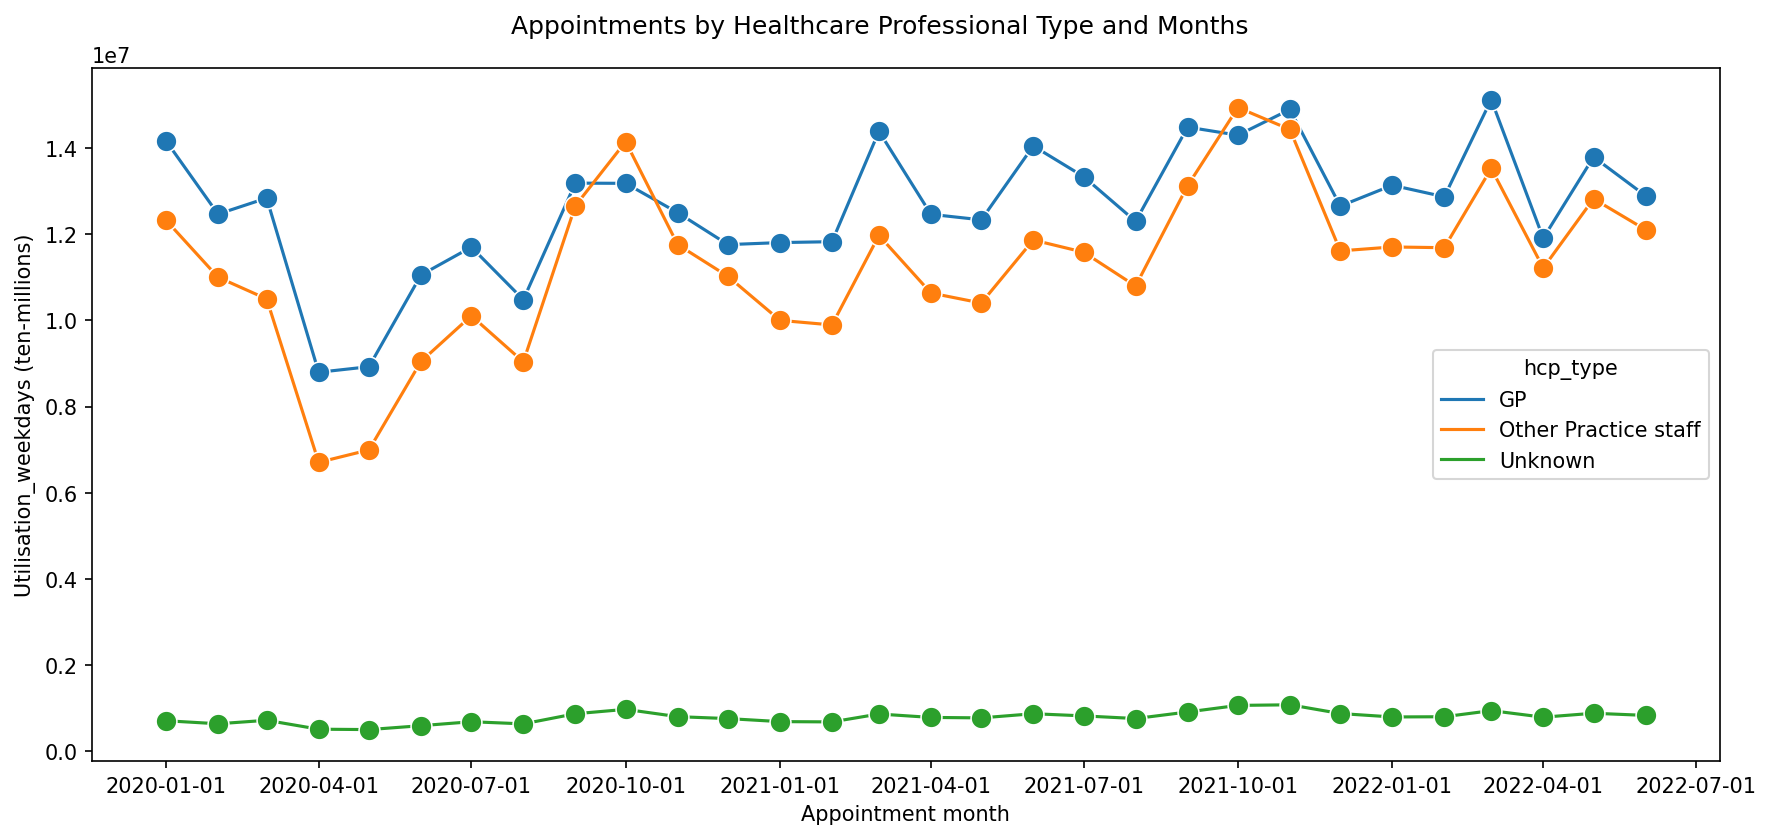

In [32]:
# Create lineplots.
fig, ax_hcp = plt.subplots(dpi=150)
fig.set_size_inches(14, 6)
sns.lineplot(x='appointment_month_dt', y='count_of_appointments', hue='hcp_type',
             data=ar,marker='o', markersize=10, ci=None, estimator='sum')

# Reset date label to be more visible.
major_locator = AutoDateLocator('appointment_month_dt')
formatter = AutoDateFormatter('appointment_month_dt')
ax_hcp.xaxis.set_major_formatter(formatter)

# Set labels and titles
ax_hcp.set_xlabel("Appointment month")
ax_hcp.set_ylabel("Utilisation_weekdays (ten-millions)")
fig.suptitle("Appointments by Healthcare Professional Type and Months", y=0.94)

##### Trend: An upward trend is noted for the amount of appointments taken by GP and other practise staff. This could either indicate better utilisation or growth in workforce. More staff data would be required.

### Identify and review the top trending hashtags (#) related to healthcare in the UK based on the data set received from the NHS.

In [33]:
# Read the data files with Pandas
tweets = pd.read_csv('tweets.csv')

# View results of DataFrame.
print(tweets.dtypes)
print(tweets.shape)

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object
(1174, 10)


In [34]:
# Create a subset of data containing text only.
tweets_text = tweets[['tweet_full_text','tweet_entities','tweet_entities_hashtags','tweet_metadata','tweet_lang']]

# Create a new list with all the Hashtags
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
print(len(tags))

4333


In [35]:
# Create a subset of data containing text only.
tweets_text_clean = tweets[['tweet_full_text','tweet_entities','tweet_entities_hashtags','tweet_metadata','tweet_lang']]

# Remove duplicated datas.
tweets_text_clean = tweets_text_clean.drop_duplicates()

# View results of DataFrame.
print(tweets_text_clean.shape)

(961, 5)


In [36]:
# Create new DataFrame from hashtags output above.
hashtag_list = pd.DataFrame(tags)

# Renaming column.
hashtag_list.columns =['word']

# Applying value_counts as a new DataFrame.
hashtag_data = hashtag_list['word'].value_counts().to_frame().reset_index()

# Renaming column.
hashtag_data.columns =['word','count']

# View results of DataFrame.
hashtag_data.head()

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [37]:
# narrow list down to 10 or more tweets and sort descending
hashtags_over20 = hashtag_data[hashtag_data['count'] > 20].sort_values('count',ascending=False)

# Exclude overrepresented Hashtags, for this case #healthcare of 716 which is significantly above others.
hashtags_over20_filter = hashtags_over20.drop(0)

# View results of DataFrame.
hashtags_over20_filter.head(10)

,word,count
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25
10,#marketing,25


C:\Users\Leona\AppData\Local\Temp\ipykernel_34484\27252919.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_tweet.set_xticklabels( hashtags_over20_filter['word'], rotation=60)


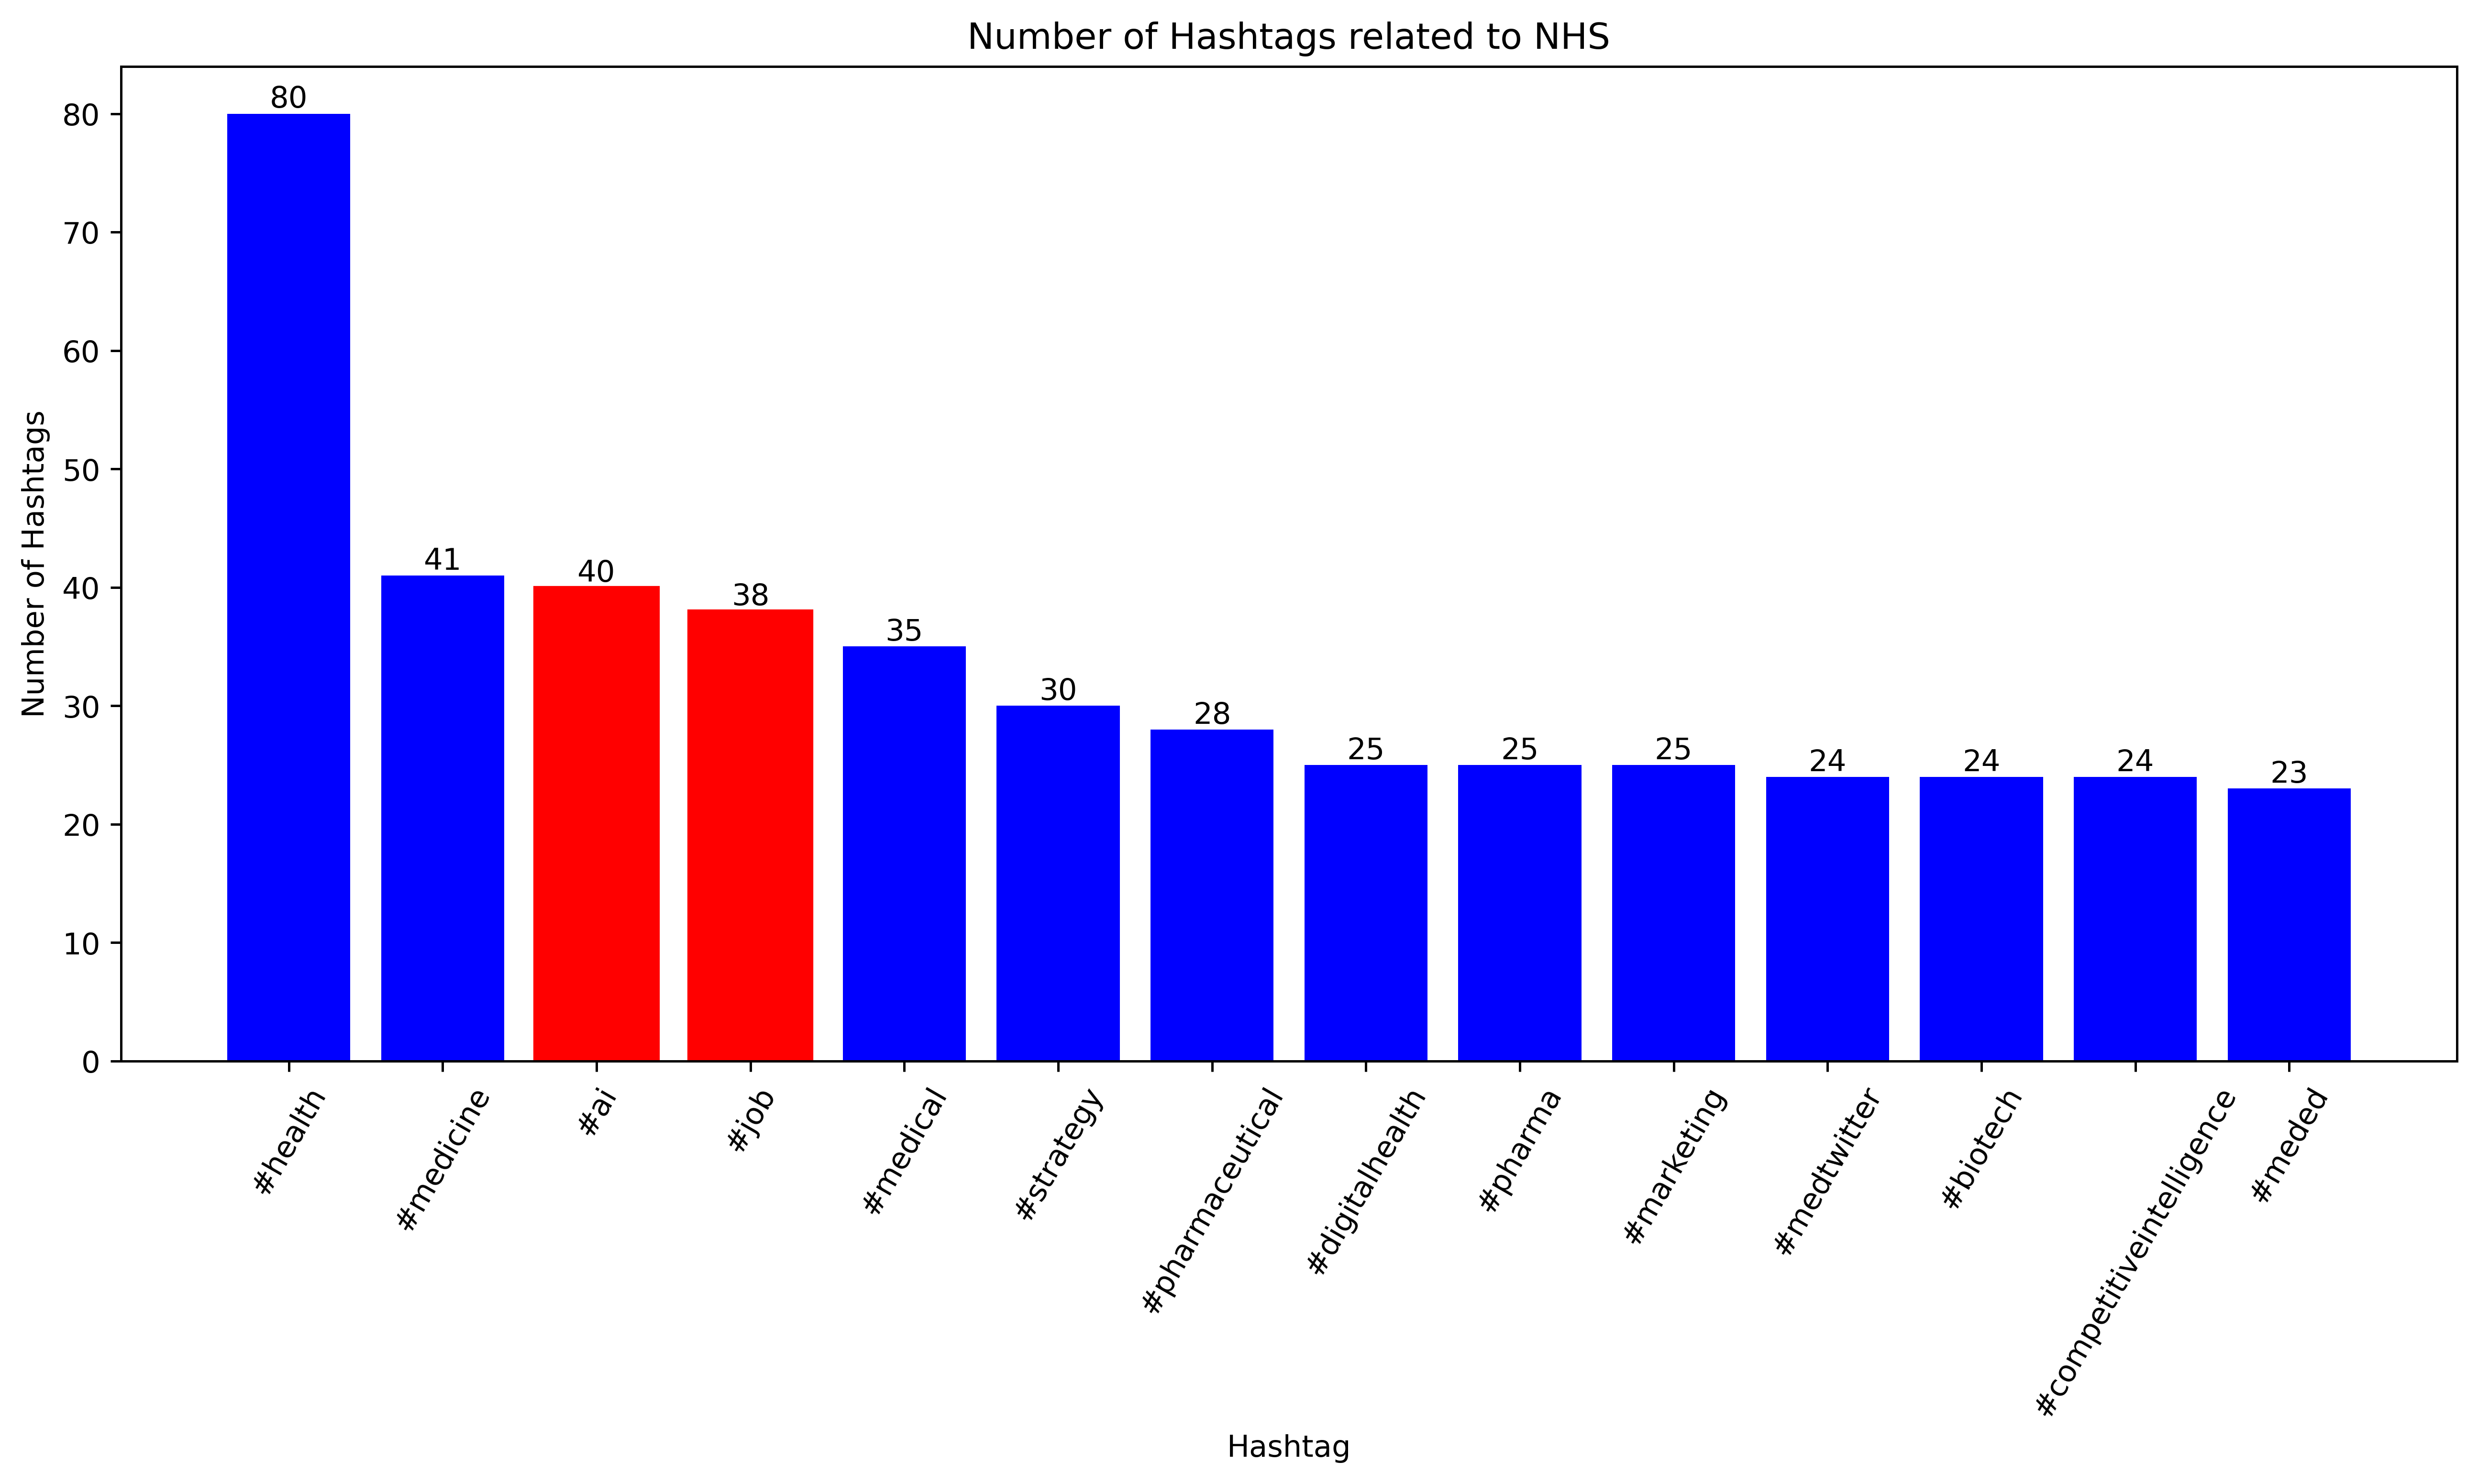

In [38]:
# Create subplots for tweets data
fig, ax_tweet = plt.subplots(dpi=450)
fig.set_size_inches(14, 6)

# Create barplot.
bars = ax_tweet.bar(hashtags_over20_filter['word'],hashtags_over20_filter['count'],color='blue',
                    label=hashtags_over20_filter['word'])

# Set labels and titles. 
ax_tweet.set_xlabel("Hashtag")
ax_tweet.set_ylabel("Number of Hashtags")
ax_tweet.set_title("Number of Hashtags related to NHS")
ax_tweet.set_xticklabels( hashtags_over20_filter['word'], rotation=60)
bars[2].set_color('red')
bars[3].set_color('red')
ax_tweet.bar_label(bars, label_type='edge')

# Saved for presentation purpose
fig.savefig('twitter_hashtags_print.png', dpi=300)

##### Trend: Noted that keywords include health, medicine, medical and those related are relevant to the Business As Usual for NHS. Notably, there are #ai and #job coming into picture, indicating there are still potential for exploration of AI and demand for jobs in NHS.